### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn.model_selection as sms
import sklearn.preprocessing as sp
import sklearn.linear_model as slm
import sklearn.metrics as sm
import sklearn.ensemble as ens
from warnings import filterwarnings 
filterwarnings('ignore') # to ignore warnings
import sklearn.linear_model as slm
import sklearn.svm as svm

### Loading data

In [2]:
# retrieving data
#df=pd.read_csv("D:\\Data\\Gamboo\Computer_Hardware\Computer Hardware\Computer Hardware.csv")
df=pd.read_csv("Computer Hardware.csv")
df.head()

,Seller Name,Model Name,Machine Cycle Time in nanoseconds,Minimum Main Memory in Kilobytes,Maximum Main Memory in kilobytes,Cache Memory in Kilobytes,Minimum Channels in Units,Maximum Channels in Units,Published Relative Performance,Estimated Relative Performance
0,amdahl,470v/7,29,8000,32000,32,8,32,269,253
1,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
2,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
3,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
4,amdahl,470v/b,26,8000,32000,64,8,32,318,290


### EDA, Preprocessing

To check the general form of columns which may need some **cleaning operations like handling null(missing values), converting datatype, and others**.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Seller Name                        208 non-null    object
 1   Model Name                         208 non-null    object
 2   Machine Cycle Time in nanoseconds  208 non-null    int64 
 3   Minimum Main Memory in Kilobytes   208 non-null    int64 
 4   Maximum Main Memory in kilobytes   208 non-null    int64 
 5   Cache Memory in Kilobytes          208 non-null    int64 
 6   Minimum Channels in Units          208 non-null    int64 
 7   Maximum Channels in Units          208 non-null    int64 
 8   Published Relative Performance     208 non-null    int64 
 9   Estimated Relative Performance     208 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 16.4+ KB


In [4]:
df.columns = ['Seller_Name', 'Model_Name', 'MYCT', 'MNM', 'MXM', 'CACH','CHMIN','CHMAX', 'PRP', 'ERP']

In [5]:
df.describe()

,MYCT,MNM,MXM,CACH,CHMIN,CHMAX,PRP,ERP
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,204.201923,2880.538462,11824.019231,24.096154,4.644231,17.740385,105.177885,98.850962
std,260.833016,3883.839300,11747.916663,37.417999,6.787198,24.913375,161.090223,154.974961
min,17.000000,64.000000,64.000000,0.000000,0.000000,0.000000,6.000000,15.000000
25%,50.000000,768.000000,4000.000000,0.000000,1.000000,5.000000,27.000000,28.000000
50%,110.000000,2000.000000,8000.000000,8.000000,2.000000,8.000000,49.500000,45.000000
75%,225.000000,4000.000000,16000.000000,32.000000,6.000000,24.000000,111.500000,99.500000
max,1500.000000,32000.000000,64000.000000,256.000000,52.000000,176.000000,1150.000000,1238.000000


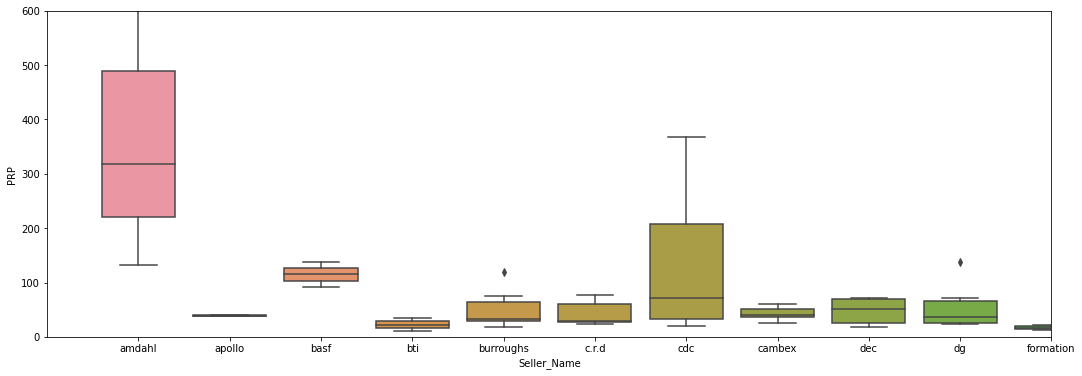

In [6]:
plt.figure(figsize=(18,6))
sns.boxplot(x=df['Seller_Name'], y=df['PRP'])
plt.xlim([-1, 10])
plt.ylim([0, 600])
plt.show()

#### Splitting data

In [7]:
X = df.drop(columns=['Seller_Name', 'Model_Name', 'ERP', 'PRP'])
y = df[['PRP']]

In [8]:
train_X, test_X, train_y, test_y = sms.train_test_split(X, y, test_size=0.2, random_state=25)
print(train_X.shape, test_X.shape, train_y.shape, test_y.shape)

(166, 6) (42, 6) (166, 1) (42, 1)


#### Data Normalization(Scaling)

**RobustScaler** is one of the preferred scalers mainly to **avoid outliers impact** if there is a chance of being

In [9]:
scaler_rb=sp.RobustScaler()
scaled_tra=scaler_rb.fit_transform(train_X)

In [10]:
names = list(train_X.columns)
train_X=pd.DataFrame(scaled_tra, columns=names)
train_X.head(3)

,MYCT,MNM,MXM,CACH,CHMIN,CHMAX
0,-0.419306,0.666667,0.000000,0.75,2.8,1.263158
1,1.161388,-0.410667,-0.291667,-0.25,-0.2,0.842105
2,-0.346908,0.000000,-0.333333,-0.25,0.2,-0.105263


In [11]:
scaled_test=scaler_rb.transform(test_X)
test_X=pd.DataFrame(data=scaled_test, columns=names)
test_X.head(3)

,MYCT,MNM,MXM,CACH,CHMIN,CHMAX
0,-0.419306,2.000000,0.666667,1.75,0.4,0.000000
1,-0.015083,0.000000,-0.333333,0.00,0.2,0.000000
2,0.558069,-0.333333,-0.333333,-0.25,-0.2,-0.210526


In [12]:
# to merge all scores and metrics results altogether
performance=pd.DataFrame(data=None, index=['MAE','RMSE','R2_score'])
performance

""
MAE
RMSE
R2_score


In [13]:
# creating function to evaluate model at one run
def evaluate(model,model_name):
    performance[model_name]=[sm.mean_absolute_error(test_y, model.predict(test_X)),
    sm.mean_squared_error(test_y, model.predict(test_X))**0.5,
    sm.r2_score(test_y, model.predict(test_X)) ]
pd.options.display.float_format = '{:.3f}'.format

### Modelling

#### Multiple linear regression model

In [14]:
lm=slm.LinearRegression()
lm.fit(train_X, train_y)
evaluate(lm, 'MLinear')
performance[['MLinear']]

,MLinear
MAE,32.231
RMSE,46.875
R2_score,0.916


#### Lasso regression model

In [15]:
# Return numbers spaced evenly on a log scale, it means that creates 50 numbers between 1 and 5
np.logspace(start=1, stop=5, num=50)

array([1.00000000e+01, 1.20679264e+01, 1.45634848e+01, 1.75751062e+01,
       2.12095089e+01, 2.55954792e+01, 3.08884360e+01, 3.72759372e+01,
       4.49843267e+01, 5.42867544e+01, 6.55128557e+01, 7.90604321e+01,
       9.54095476e+01, 1.15139540e+02, 1.38949549e+02, 1.67683294e+02,
       2.02358965e+02, 2.44205309e+02, 2.94705170e+02, 3.55648031e+02,
       4.29193426e+02, 5.17947468e+02, 6.25055193e+02, 7.54312006e+02,
       9.10298178e+02, 1.09854114e+03, 1.32571137e+03, 1.59985872e+03,
       1.93069773e+03, 2.32995181e+03, 2.81176870e+03, 3.39322177e+03,
       4.09491506e+03, 4.94171336e+03, 5.96362332e+03, 7.19685673e+03,
       8.68511374e+03, 1.04811313e+04, 1.26485522e+04, 1.52641797e+04,
       1.84206997e+04, 2.22299648e+04, 2.68269580e+04, 3.23745754e+04,
       3.90693994e+04, 4.71486636e+04, 5.68986603e+04, 6.86648845e+04,
       8.28642773e+04, 1.00000000e+05])

In [16]:
lasso=slm.LassoCV(alphas=np.logspace(start=1, stop=5, num=50),cv=5)
out_lasso = lasso.fit(train_X, train_y)
out_lasso.alpha_

10.0

In [17]:
evaluate(out_lasso, 'Lasso')
performance[['Lasso']]

,Lasso
MAE,32.910
RMSE,54.377
R2_score,0.886


#### Ridge regression model

In [18]:
ridge=slm.RidgeCV(alphas=np.logspace(start=1, stop=5, num=50),cv=5)
out_ridge=ridge.fit(train_X, train_y)
ridge.alpha_

95.40954763499938

In [19]:
evaluate(out_ridge, 'Ridge')
performance[['Ridge']]

,Ridge
MAE,32.270
RMSE,61.360
R2_score,0.855


#### ElasticNet regression model

In [20]:
elastic_net=slm.ElasticNetCV(l1_ratio=0.45,alphas=np.logspace(start=1, stop=5, num=50),cv=5)
out_elastic_net=elastic_net.fit(train_X, train_y)

In [21]:
print(out_elastic_net.alpha_)
out_elastic_net.coef_

10.0


array([-4.2463035 , 17.171761  , 13.40732559, 12.62111071, 10.90057509,
       10.06853192])

In [22]:
evaluate(out_elastic_net, 'Elastic_Net')
performance[['Elastic_Net']]

,Elastic_Net
MAE,54.753
RMSE,108.898
R2_score,0.544


#### SVR regression model

We will do **Hyperparameter tuning** to find **otimal best** parameters in some models

In [23]:
parameters = {'kernel':('linear', 'rbf', 'poly', 'sigmoid'), 'C':[1, 5, 10, 50, 100, 500, 1000] }
svr = svm.SVR()
clf = sms.GridSearchCV(svr, parameters)
clf.fit(train_X, train_y)
clf.best_params_

{'C': 5, 'kernel': 'linear'}

In [24]:
evaluate(clf,'SVR')
performance[['SVR']]

,SVR
MAE,33.552
RMSE,86.282
R2_score,0.714


### Ensemble methods

#### RandomForest regression model

In [25]:
parameters = { 'n_estimators':[i for i in range(150,200,10)] }
rfr = ens.RandomForestRegressor(random_state=25)
clf3 = sms.GridSearchCV(rfr, parameters)
clf3.fit(train_X, train_y)

clf3.best_params_

{'n_estimators': 180}

In [26]:
evaluate(clf3, 'R_forest')
performance[['R_forest']]

,R_forest
MAE,16.559
RMSE,26.583
R2_score,0.973


##### ExtraTree regression model

In [27]:
parameters = { 'n_estimators':[i for i in range(80,200,10)] }
etr = ens.ExtraTreesRegressor(random_state=25)
clf4 = sms.GridSearchCV(etr, parameters)
clf4.fit(train_X, train_y)

clf4.best_params_

{'n_estimators': 160}

In [28]:
evaluate(clf4, 'ExTree')
performance[['ExTree']]

,ExTree
MAE,18.076
RMSE,28.738
R2_score,0.968


#### GradientBoosting regression model

In [29]:
parameters = { 'learning_rate':[0.1,0.01,0.001], 'n_estimators':[50,100,150,200,250] }
gbr = ens.GradientBoostingRegressor(random_state=25)
clf5 = sms.GridSearchCV(gbr, parameters)
clf5.fit(train_X, train_y)

clf5.best_params_

{'learning_rate': 0.01, 'n_estimators': 250}

In [30]:
evaluate(clf5, 'GradientBR')
performance[['GradientBR']]

,GradientBR
MAE,21.079
RMSE,31.492
R2_score,0.962


#### AdaBoost regression model

In [31]:
parameters = { 'learning_rate':[0.1, 1, 2], 'n_estimators':[50,100,150,200]}
abr = ens.AdaBoostRegressor(random_state=25)
clf6 = sms.GridSearchCV(abr, parameters)
clf6.fit(train_X, train_y)

clf6.best_params_

{'learning_rate': 0.1, 'n_estimators': 200}

In [32]:
evaluate(clf6, 'AdaBR')
performance[['AdaBR']]

,AdaBR
MAE,26.686
RMSE,44.649
R2_score,0.923


#### Voting regression model

In [33]:
performance

,MLinear,Lasso,Ridge,Elastic_Net,SVR,R_forest,ExTree,GradientBR,AdaBR
MAE,32.231,32.910,32.270,54.753,33.552,16.559,18.076,21.079,26.686
RMSE,46.875,54.377,61.360,108.898,86.282,26.583,28.738,31.492,44.649
R2_score,0.916,0.886,0.855,0.544,0.714,0.973,0.968,0.962,0.923


In [34]:
# estimators for Voting model are prefitted models those were evaluated before
vr = ens.VotingRegressor([('GradientB', clf5), ('ExtraTree', clf4), ('RandomF', clf3)])
vr.fit(train_X, train_y)

evaluate(vr, 'VotingR')
performance

,MLinear,Lasso,Ridge,Elastic_Net,SVR,R_forest,ExTree,GradientBR,AdaBR,VotingR
MAE,32.231,32.910,32.270,54.753,33.552,16.559,18.076,21.079,26.686,16.933
RMSE,46.875,54.377,61.360,108.898,86.282,26.583,28.738,31.492,44.649,26.012
R2_score,0.916,0.886,0.855,0.544,0.714,0.973,0.968,0.962,0.923,0.974


I merged evaluation metrics and scores of all models we trained into **"performance"** in order to make the comparison. So, 
that can be seen some models performed better like **GradientBoost, ExtraTree, RandomForest, Voting regression** models.
Particularly, doing of **hyperparameter tuning** boosted performance on closer optimal values

According to the comparison of models performances, the **Voting regression** is the optimal(best for now) model to pick and to utilize as the major

**Thanks**